In [13]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(wine_url, index_col=0)
wine['taste'] = wine['quality'].apply(lambda x: 1 if x > 5 else 0)

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred = lr.predict(X_test)

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))

Accuracy: 0.744
Precision: 0.774
Recall: 0.841


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.58      0.62       477
           1       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [17]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[275 202]
 [131 692]]


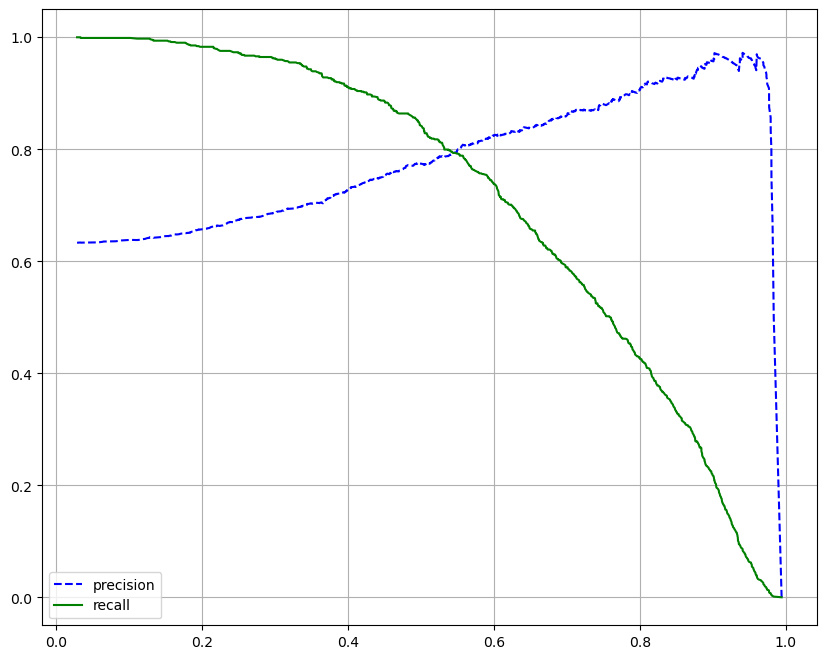

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
%matplotlib inline

plt.figure(figsize=(10, 8))
pred = lr.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred)
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
plt.grid()
plt.legend()
plt.show()

In [20]:
import numpy as np

pred_proba = lr.predict_proba(X_test)
np.concatenate([pred_proba, lr.predict(X_test).reshape(-1, 1)], axis=1)

array([[0.40511422, 0.59488578, 1.        ],
       [0.50942858, 0.49057142, 0.        ],
       [0.1021066 , 0.8978934 , 1.        ],
       ...,
       [0.2253031 , 0.7746969 , 1.        ],
       [0.67385289, 0.32614711, 0.        ],
       [0.31468732, 0.68531268, 1.        ]])

In [22]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:, 1]
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [23]:
np.concatenate([pred_proba, lr.predict(X_test).reshape(-1, 1), pred_bin.reshape(-1, 1)], axis=1)

array([[0.40511422, 0.59488578, 1.        , 0.        ],
       [0.50942858, 0.49057142, 0.        , 0.        ],
       [0.1021066 , 0.8978934 , 1.        , 1.        ],
       ...,
       [0.2253031 , 0.7746969 , 1.        , 1.        ],
       [0.67385289, 0.32614711, 0.        , 0.        ],
       [0.31468732, 0.68531268, 1.        , 1.        ]])

In [24]:
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       477
           1       0.82      0.74      0.78       823

    accuracy                           0.74      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.74      0.74      1300

